# Rerun DataWrangling8 processes with alernative datasets from DataWrangling 9

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import klib

from IPython.core.display import display

# pd.set_option('display.max_columns', None)
# pd.reset_optio('max_rows')
#np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

# Load data and constants

In [2]:
avg_NE_aqi_2017_2019 = pd.read_csv('../../data/processed/clean_avg_NE_aqi_2017_2019')

NE_dem_ratio_2017_2019 = pd.read_csv('../../data/processed/clean_NE_dem_ratio_2017_2019.csv')

NE_unemploy_rate_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_unemploy_rate_2017_2019.csv')

NE_pov_ratio_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_pov_rate_2017_2019.csv')

NE_educ_vehicle_2017_2019 = pd.read_csv('../../data/processed/alt_clean_NE_edu_vehicle_2017_2019.csv')

In [3]:
def remove_col(df, col_name):
    '''Returns a dataframe with removed column or columns from old dataframe'''
    new_df = df.copy()

    if(type(col_name) != str and len(col_name) > 1):
        for index in col_name:
            new_df = new_df.drop(str(index), axis=1)
    else:
        new_df = new_df.drop(str(col_name), axis=1)
    return new_df

* have all data for 2017 all compiled together merged columns
* then repeat for 2018 and 2019 data

In [4]:
display(avg_NE_aqi_2017_2019)
display(NE_unemploy_rate_2017_2019)
display(NE_pov_ratio_2017_2019)
display(NE_educ_vehicle_2017_2019)
display(NE_dem_ratio_2017_2019)

,GeoFIPS,State Name,county Name,AQI_2017,AQI_2018,AQI_2019
0,9001,Connecticut,Fairfield,46.315068,47.904110,46.495890
1,9003,Connecticut,Hartford,43.202740,40.594521,41.490411
2,9005,Connecticut,Litchfield,38.250689,38.449036,38.564384
3,9007,Connecticut,Middlesex,44.028986,43.875000,44.487805
4,9009,Connecticut,New Haven,44.789041,45.509589,46.090411
...,...,...,...,...,...,...
142,42133,Pennsylvania,York,44.241096,41.961644,41.761644
143,50003,Vermont,Bennington,36.271978,36.186301,35.994521
144,50007,Vermont,Chittenden,35.632877,38.520548,37.457534
145,50021,Vermont,Rutland,38.172603,38.780822,38.273973


,GeoFIPS,Stabr,area_name,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019
0,9001,CT,"Fairfield County, CT",479458,457625,21833,4.6,479179,460045,19134,4.0,481023,463547,17476,3.6
1,9003,CT,"Hartford County, CT",477390,454205,23185,4.9,478660,458138,20522,4.3,483303,464533,18770,3.9
2,9005,CT,"Litchfield County, CT",104051,99522,4529,4.4,104604,100568,4036,3.9,105182,101543,3639,3.5
3,9007,CT,"Middlesex County, CT",92583,88817,3766,4.1,92811,89517,3294,3.5,93696,90703,2993,3.2
4,9009,CT,"New Haven County, CT",457800,434645,23155,5.1,458799,438485,20314,4.4,461613,443514,18099,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,50019,VT,"Orleans County, VT",13601,12920,681,5.0,13501,12924,577,4.3,13275,12713,562,4.2
235,50021,VT,"Rutland County, VT",31096,30030,1066,3.4,30752,29828,924,3.0,30446,29608,838,2.8
236,50023,VT,"Washington County, VT",34260,33273,987,2.9,34512,33658,854,2.5,34360,33586,774,2.3
237,50025,VT,"Windham County, VT",22823,22132,691,3.0,22470,21856,614,2.7,21977,21416,561,2.6


,GeoFIPS,Postal Code,Name,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",...,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019
0,9001,CT,Fairfield County,82428.0,74608.0,90248.0,8.8,8.0,9.6,24161.0,...,13.3,18562.0,16078.0,21046.0,11.9,10.3,13.5,96966.0,93161.0,100771.0
1,9003,CT,Hartford County,96200.0,88256.0,104144.0,11.0,10.1,11.9,28488.0,...,16.0,17852.0,15166.0,20538.0,13.1,11.1,15.1,75336.0,73281.0,77391.0
2,9005,CT,Litchfield County,12481.0,10381.0,14581.0,6.9,5.7,8.1,2642.0,...,11.6,2077.0,1591.0,2563.0,8.5,6.5,10.5,81015.0,77226.0,84804.0
3,9007,CT,Middlesex County,10796.0,8906.0,12686.0,6.8,5.6,8.0,2169.0,...,9.1,1388.0,981.0,1795.0,6.6,4.7,8.5,81721.0,74613.0,88829.0
4,9009,CT,New Haven County,91639.0,82523.0,100755.0,11.0,9.9,12.1,26499.0,...,20.5,22220.0,19581.0,24859.0,17.8,15.7,19.9,69687.0,66999.0,72375.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,50019,VT,Orleans County,3962.0,3189.0,4735.0,15.2,12.2,18.2,1007.0,...,23.3,643.0,427.0,859.0,16.7,11.1,22.3,48826.0,43855.0,53797.0
234,50021,VT,Rutland County,6106.0,4691.0,7521.0,10.8,8.3,13.3,1518.0,...,16.4,849.0,480.0,1218.0,11.4,6.5,16.3,51903.0,49484.0,54322.0
235,50023,VT,Washington County,5252.0,4184.0,6320.0,9.4,7.5,11.3,1114.0,...,12.7,636.0,373.0,899.0,8.0,4.7,11.3,65879.0,61501.0,70257.0
236,50025,VT,Windham County,4827.0,3819.0,5835.0,11.6,9.2,14.0,1138.0,...,17.9,664.0,410.0,918.0,12.5,7.7,17.3,52068.0,47230.0,56906.0


,GeoFIPS,NAME,state,county,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,...,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019
0,36089,"St. Lawrence County, New York",36,89,109623,72555.0,9164.0,25858.0,20091.0,8279.0,...,8684.0,7733.0,33650,67.044737,8.564136,23.762762,19.480230,8.060145,7.177464,31.232597
1,36091,"Saratoga County, New York",36,91,229869,164414.0,10656.0,39033.0,45561.0,37886.0,...,40148.0,30363.0,104085,72.095118,4.492676,17.754924,19.172290,17.466056,13.209172,45.281320
2,36093,"Schenectady County, New York",36,93,155565,107453.0,10085.0,32144.0,35263.0,17210.0,...,22627.0,15566.0,59970,70.183324,5.047682,20.198456,20.343982,14.569959,10.023245,38.615831
3,36101,"Steuben County, New York",36,101,96281,68011.0,6510.0,25920.0,20685.0,7451.0,...,8066.0,8475.0,35505,71.044989,6.093585,25.791841,21.817171,8.456788,8.885604,37.225175
4,36103,"Suffolk County, New York",36,103,1492953,1036946.0,102621.0,277080.0,279213.0,208064.0,...,214035.0,182346.0,629360,70.148605,6.397598,18.389192,18.517663,14.495114,12.349037,42.622211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,36079,"Putnam County, New York",36,79,99323,71447.0,5090.0,20597.0,18095.0,14929.0,...,15240.0,12261.0,42420,73.443857,5.721115,19.355167,20.396664,15.500407,12.470504,43.144833
148,36081,"Queens County, New York",36,81,2358582,1695302.0,304984.0,493794.0,372885.0,335990.0,...,334272.0,207624.0,387870,72.484558,12.328372,19.812340,16.300805,14.831103,9.211938,17.209159
149,36083,"Rensselaer County, New York",36,83,159722,111047.0,9095.0,31730.0,34954.0,20143.0,...,20896.0,18203.0,65615,70.327759,5.902441,19.919478,19.870963,13.165820,11.469058,41.341659
150,36085,"Richmond County, New York",36,85,479458,334079.0,39031.0,100730.0,83679.0,66108.0,...,71914.0,48875.0,128740,70.041143,7.701258,20.426427,16.545240,15.103446,10.264773,27.038096


,GeoFIPS,STNAME,CTYNAME,TOT_POP_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield County,943038,48.698144,51.301856,38.829612,40.207712,5.820020,6.748509,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,9003,Connecticut,Hartford County,893076,48.577389,51.422611,36.713113,38.908671,7.458828,8.052954,...,7.626834,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819
2,9005,Connecticut,Litchfield County,181667,49.403029,50.596971,46.221383,47.592023,1.153209,0.968806,...,3.141965,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736
3,9007,Connecticut,Middlesex County,162942,48.714266,51.285734,43.542488,45.679444,2.628543,2.723055,...,2.782019,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013
4,9009,Connecticut,New Haven County,857748,48.214627,51.785373,37.804577,40.195955,6.927792,7.800659,...,8.058080,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,50019,Vermont,Orleans County,26811,50.199545,49.800455,48.375667,48.054903,0.477416,0.309574,...,0.828494,0.702741,0.073973,0.070274,0.059178,0.051781,0.022192,0.018493,0.011096,0.007397
235,50021,Vermont,Rutland County,59006,49.347524,50.652476,47.701929,48.906891,0.415212,0.250822,...,0.740664,0.704576,0.089361,0.044680,0.054991,0.049836,0.024059,0.015466,0.006874,0.005155
236,50023,Vermont,Washington County,58253,49.453247,50.546753,47.386401,48.524540,0.573361,0.374230,...,0.919379,0.910819,0.089027,0.051362,0.068483,0.053074,0.018833,0.020545,0.006848,0.000000
237,50025,Vermont,Windham County,42851,49.002357,50.997643,46.542671,48.425941,0.828452,0.576416,...,1.162901,1.025532,0.118422,0.146843,0.073421,0.066316,0.033158,0.028421,0.011842,0.004737


In [5]:
# try to make a new category for aqi having levels
#
# avg_NE_aqi_2017_2019
# aqi_level = []
#
# for aqi in avg_NE_aqi_2017_2019['AQI_2017'].values:
#     if(aqi <= 50):
#         aqi_level.append(1)
#     elif(aqi <= 100):
#         aqi_level.append(2)
#     elif(aqi <= 150):
#         aqi_level.append(3)
#     elif(aqi <= 200):
#         aqi_level.append(4)
#     elif(aqi <= 300):
#         aqi_level.append(5)
#     else:
#         aqi_level.append(6)
# aqi_level
#
# avg_NE_aqi_2017_2019.insert(4, 'aqi_level_2017', aqi_level)
# avg_NE_aqi_2017_2019

level 1 = 0-50 good
level 2 = 51-100 moderate
level 3 = 101-150 unhealthy for sensitive groups
level 4 = 151-200 unhealthy
level 5 = 201-300 very unhealthy
level 6 = 300+ hazardous

## Try make one df of 2017
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [6]:
avg_NE_aqi_2017 = avg_NE_aqi_2017_2019.iloc[:,:4]
NE_unemploy_rate_2017 = NE_unemploy_rate_2017_2019.iloc[:, [0, 3, 4, 5, 6]]

pov_col_2017 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[3:24])
NE_pov_ratio_2017 = NE_pov_ratio_2017_2019.loc[:, pov_col_2017]

educ_vehicle_2017_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[4:19])
NE_educ_vehicle_2017 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2017_col]

dem_ratio_2017_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[3:76])
NE_dem_ratio_2017 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2017_col]

In [7]:
NE_avg_aqi_unemploy_2017 = pd.merge(avg_NE_aqi_2017, NE_unemploy_rate_2017, how='inner')
NE_avg_aqi_unemploy_pov_2017 = pd.merge(NE_avg_aqi_unemploy_2017, NE_pov_ratio_2017, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2017 = pd.merge(NE_avg_aqi_unemploy_pov_2017, NE_educ_vehicle_2017, how='inner')
df_2017 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2017, NE_dem_ratio_2017, how='inner')

df_2017

,GeoFIPS,State Name,county Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,...,HWAC_MALE_ratio_2017,HWAC_FEMALE_ratio_2017,HBAC_MALE_ratio_2017,HBAC_FEMALE_ratio_2017,HIAC_MALE_ratio_2017,HIAC_FEMALE_ratio_2017,HAAC_MALE_ratio_2017,HAAC_FEMALE_ratio_2017,HNAC_MALE_ratio_2017,HNAC_FEMALE_ratio_2017
0,9001,Connecticut,Fairfield,46.315068,479458,457625,21833,4.6,82428.0,74608.0,...,8.771863,8.578764,1.047678,1.109499,0.298079,0.263828,0.113781,0.094164,0.076773,0.055883
1,9003,Connecticut,Hartford,43.202740,477390,454205,23185,4.9,96200.0,88256.0,...,7.358612,7.653212,1.394618,1.551380,0.293480,0.299639,0.128544,0.121266,0.068415,0.050612
2,9005,Connecticut,Litchfield,38.250689,104051,99522,4529,4.4,12481.0,10381.0,...,2.739078,2.630637,0.390825,0.361100,0.142569,0.131559,0.040183,0.039633,0.030826,0.019816
3,9007,Connecticut,Middlesex,44.028986,92583,88817,3766,4.1,10796.0,8906.0,...,2.658001,2.714463,0.386641,0.427146,0.088375,0.102490,0.055848,0.054007,0.025162,0.025162
4,9009,Connecticut,New Haven,44.789041,457800,434645,23155,5.1,91639.0,82523.0,...,7.649333,7.797512,1.208747,1.338155,0.262198,0.275372,0.093034,0.090236,0.044419,0.045701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,42111,Pennsylvania,Somerset,37.041322,33634,31613,2021,6.0,8795.0,7212.0,...,0.879556,0.447186,0.136042,0.017510,0.051184,0.024245,0.048490,0.005388,0.002694,0.002694
119,42125,Pennsylvania,Washington,49.115068,106359,100831,5528,5.2,18913.0,15932.0,...,0.809852,0.687191,0.104793,0.090305,0.054087,0.034770,0.021248,0.021731,0.005312,0.004346
120,42129,Pennsylvania,Westmoreland,46.994475,180797,171495,9302,5.1,34404.0,30495.0,...,0.542320,0.494310,0.085226,0.079544,0.031534,0.027556,0.008807,0.010227,0.004829,0.003693
121,42133,Pennsylvania,York,44.241096,234928,224744,10184,4.3,40966.0,36227.0,...,3.045227,2.871708,0.733809,0.703953,0.159153,0.140521,0.052303,0.054098,0.024692,0.024243


* df_2017 contains data on NorthEastern counties of the US
* The columns of df_2017 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

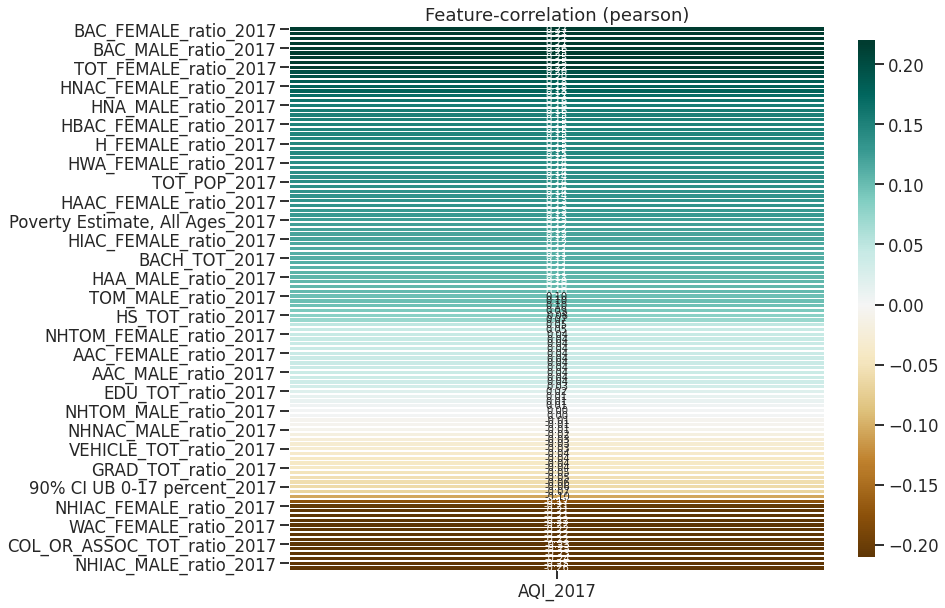

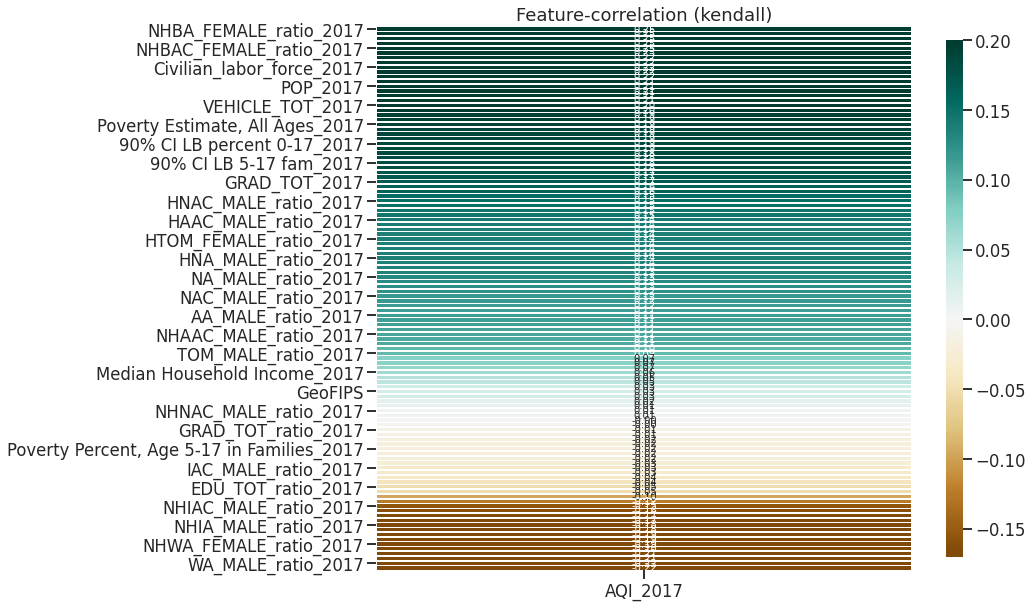

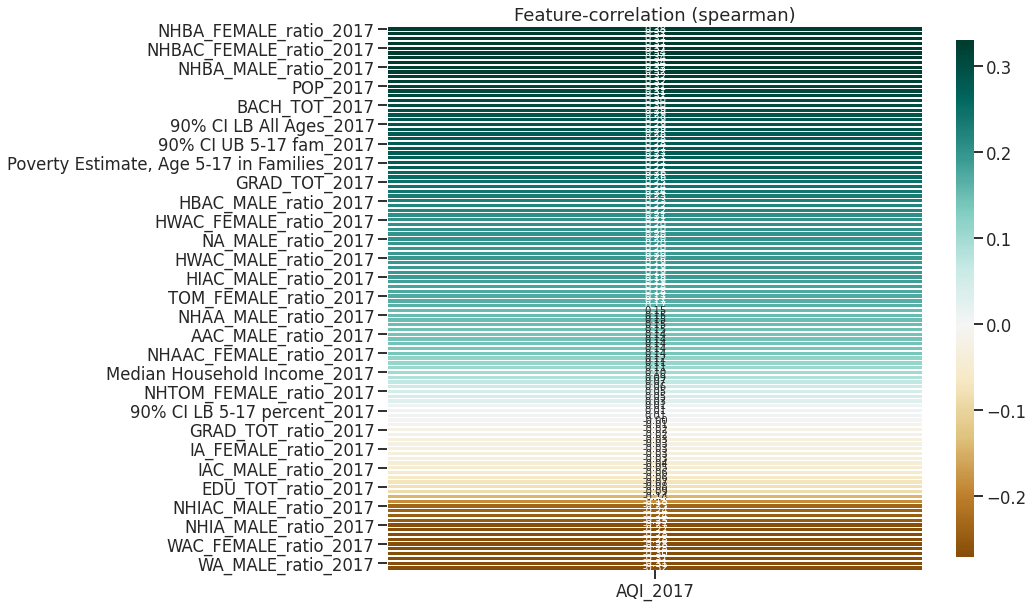

In [8]:
klib.corr_plot(df_2017, target='AQI_2017', method='pearson')
klib.corr_plot(df_2017, target='AQI_2017', method='kendall')
klib.corr_plot(df_2017, target='AQI_2017', method='spearman')

## Try make one df of 2018
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [9]:
avg_NE_aqi_2018 = avg_NE_aqi_2017_2019.iloc[:, [0, 1, 2, 4]]

unemploy_col_2018 = list(NE_unemploy_rate_2017_2019.columns[0:1]) + list(NE_unemploy_rate_2017_2019.columns[7:11])
NE_unemploy_rate_2018 = NE_unemploy_rate_2017_2019.loc[:, unemploy_col_2018]

pov_col_2018 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[24:45])
NE_pov_ratio_2018 = NE_pov_ratio_2017_2019.loc[:, pov_col_2018]

educ_vehicle_2018_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[19:34])
NE_educ_vehicle_2018 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2018_col]

dem_ratio_2018_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[76:149])
NE_dem_ratio_2018 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2018_col]

In [10]:
NE_avg_aqi_unemploy_2018 = pd.merge(avg_NE_aqi_2018, NE_unemploy_rate_2018, how='inner')
NE_avg_aqi_unemploy_pov_2018 = pd.merge(NE_avg_aqi_unemploy_2018, NE_pov_ratio_2018, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2018 = pd.merge(NE_avg_aqi_unemploy_pov_2018, NE_educ_vehicle_2018, how='inner')
df_2018 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2018, NE_dem_ratio_2018, how='inner')

df_2018

,GeoFIPS,State Name,county Name,AQI_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,"Poverty Estimate, All Ages_2018",90% CI LB All Ages_2018,...,HWAC_MALE_ratio_2018,HWAC_FEMALE_ratio_2018,HBAC_MALE_ratio_2018,HBAC_FEMALE_ratio_2018,HIAC_MALE_ratio_2018,HIAC_FEMALE_ratio_2018,HAAC_MALE_ratio_2018,HAAC_FEMALE_ratio_2018,HNAC_MALE_ratio_2018,HNAC_FEMALE_ratio_2018
0,9001,Connecticut,Fairfield,47.904110,479179,460045,19134,4.0,92971.0,86234.0,...,8.943071,8.786817,1.085838,1.145798,0.307001,0.280199,0.118542,0.098944,0.075426,0.059536
1,9003,Connecticut,Hartford,40.594521,478660,458138,20522,4.3,96957.0,89308.0,...,7.534003,7.856327,1.422730,1.596496,0.301149,0.312801,0.132425,0.121446,0.070806,0.051872
2,9005,Connecticut,Litchfield,38.449036,104604,100568,4036,3.9,12441.0,10517.0,...,2.973577,2.829454,0.425191,0.387642,0.155719,0.137497,0.043071,0.046937,0.025401,0.023744
3,9007,Connecticut,Middlesex,43.875000,92811,89517,3294,3.5,10556.0,8754.0,...,2.716891,2.783815,0.400319,0.444526,0.098852,0.107448,0.049733,0.054031,0.024559,0.025173
4,9009,Connecticut,New Haven,45.509589,458799,438485,20314,4.4,96563.0,88623.0,...,7.905402,8.066201,1.249050,1.394563,0.274688,0.284257,0.096736,0.095686,0.047143,0.046909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,42111,Pennsylvania,Somerset,35.336134,33494,31804,1690,5.0,8289.0,6698.0,...,0.885315,0.434535,0.140784,0.020305,0.055501,0.021659,0.048733,0.004061,0.005415,0.004061
119,42125,Pennsylvania,Washington,46.263014,106242,101702,4540,4.3,18274.0,15388.0,...,0.826981,0.706219,0.111584,0.092263,0.063280,0.040093,0.022220,0.018839,0.003381,0.003381
120,42129,Pennsylvania,Westmoreland,37.884615,179859,172002,7857,4.4,31749.0,27861.0,...,0.566115,0.507335,0.089597,0.082749,0.034241,0.027393,0.012555,0.011128,0.002568,0.003709
121,42133,Pennsylvania,York,41.961644,234583,225632,8951,3.8,38582.0,33740.0,...,3.207792,3.067565,0.766780,0.733956,0.162556,0.150944,0.055823,0.056046,0.026348,0.026795


* df_2018 contains data on NorthEastern counties of the US
* The columns of df_2018 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

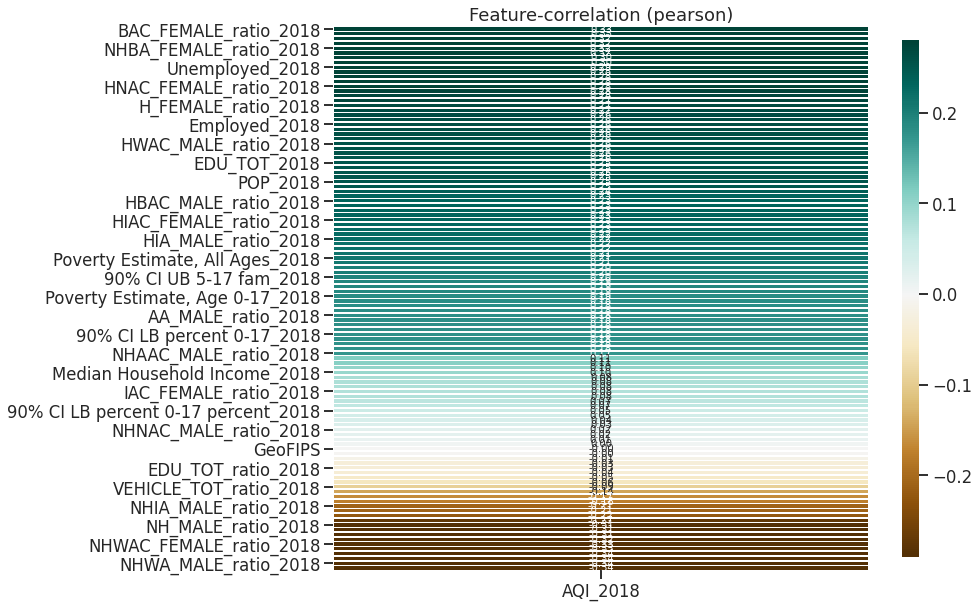

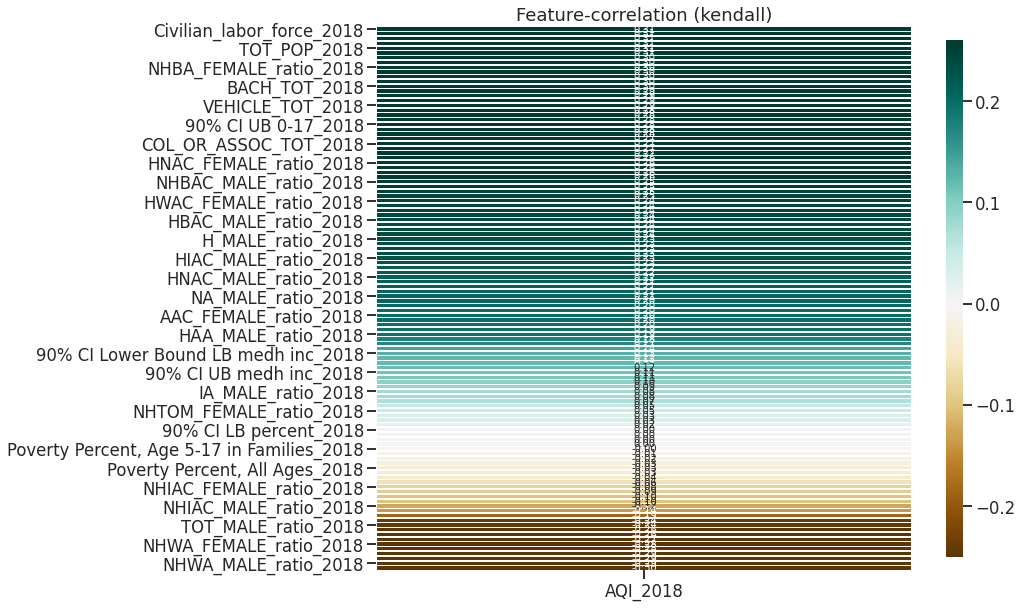

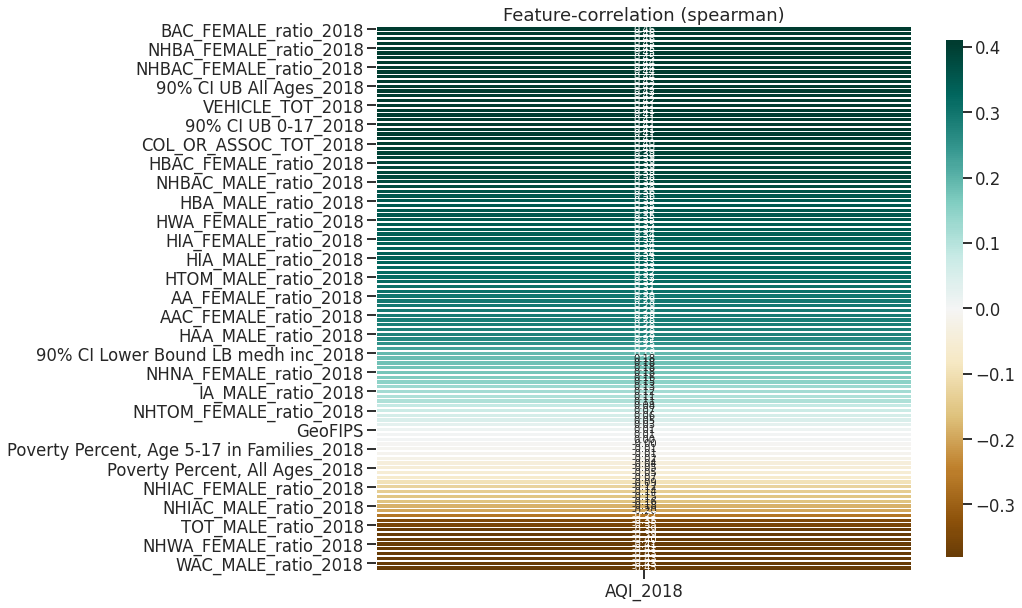

In [11]:
klib.corr_plot(df_2018, target='AQI_2018', method='pearson')
klib.corr_plot(df_2018, target='AQI_2018', method='kendall')
klib.corr_plot(df_2018, target='AQI_2018', method='spearman')

## Try make one df of 2019
* Cleaning for datasets were done in Data_Wrangling4 and Data_Wrangling7 files
* So only transforming datasets into one will work

In [12]:
avg_NE_aqi_2019 = avg_NE_aqi_2017_2019.iloc[:,[0, 1, 2, 5]]

unemploy_col_2019 = list(NE_unemploy_rate_2017_2019.columns[0:1]) + list(NE_unemploy_rate_2017_2019.columns[11:])
NE_unemploy_rate_2019 = NE_unemploy_rate_2017_2019.loc[:, unemploy_col_2019]

pov_col_2019 = list(NE_pov_ratio_2017_2019.columns[0:1]) + list(NE_pov_ratio_2017_2019.columns[45:])
NE_pov_ratio_2019 = NE_pov_ratio_2017_2019.loc[:, pov_col_2019]

educ_vehicle_2019_col = list(NE_educ_vehicle_2017_2019.columns[0:1]) + list(NE_educ_vehicle_2017_2019.columns[34:])
NE_educ_vehicle_2019 = NE_educ_vehicle_2017_2019.loc[:, educ_vehicle_2019_col]

dem_ratio_2019_col = list(NE_dem_ratio_2017_2019.columns[0:1]) + list(NE_dem_ratio_2017_2019.columns[149:])
NE_dem_ratio_2019 = NE_dem_ratio_2017_2019.loc[:, dem_ratio_2019_col]

In [13]:
NE_avg_aqi_unemploy_2019 = pd.merge(avg_NE_aqi_2019, NE_unemploy_rate_2019, how='inner')
NE_avg_aqi_unemploy_pov_2019 = pd.merge(NE_avg_aqi_unemploy_2019, NE_pov_ratio_2019, how='inner')
NE_avg_aqi_unemploy_pov_educ_veh_2019 = pd.merge(NE_avg_aqi_unemploy_pov_2019, NE_educ_vehicle_2019, how='inner')
df_2019 = pd.merge(NE_avg_aqi_unemploy_pov_educ_veh_2019, NE_dem_ratio_2019, how='inner')

df_2019

,GeoFIPS,State Name,county Name,AQI_2019,Civilian_labor_force_2019,Employed_2019,Unemployed_2019,Unemployment_rate_2019,"Poverty Estimate, All Ages_2019",90% CI LB All Ages_2019,...,HWAC_MALE_ratio_2019,HWAC_FEMALE_ratio_2019,HBAC_MALE_ratio_2019,HBAC_FEMALE_ratio_2019,HIAC_MALE_ratio_2019,HIAC_FEMALE_ratio_2019,HAAC_MALE_ratio_2019,HAAC_FEMALE_ratio_2019,HNAC_MALE_ratio_2019,HNAC_FEMALE_ratio_2019
0,9001,Connecticut,Fairfield,46.495890,481023,463547,17476,3.6,83047.0,75296.0,...,9.077186,8.966514,1.128341,1.183995,0.319082,0.286113,0.119788,0.099647,0.077173,0.059682
1,9003,Connecticut,Hartford,41.490411,483303,464533,18770,3.9,93694.0,86070.0,...,7.626834,7.970103,1.458642,1.633585,0.303234,0.315458,0.137711,0.124815,0.069304,0.052819
2,9005,Connecticut,Litchfield,38.564384,105182,101543,3639,3.5,12741.0,10601.0,...,3.141965,3.005551,0.454714,0.417561,0.167468,0.144732,0.053789,0.051017,0.030499,0.022736
3,9007,Connecticut,Middlesex,44.487805,93696,90703,2993,3.2,11024.0,9322.0,...,2.782019,2.829422,0.419858,0.471570,0.088035,0.112044,0.056022,0.052944,0.029550,0.032013
4,9009,Connecticut,New Haven,46.090411,461613,443514,18099,3.9,99423.0,91433.0,...,8.058080,8.240939,1.302943,1.452343,0.285812,0.297628,0.097104,0.095115,0.048786,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,42111,Pennsylvania,Somerset,36.281337,33659,31869,1790,5.3,8552.0,7042.0,...,0.901330,0.441134,0.147045,0.017700,0.057184,0.025869,0.046292,0.008169,0.004085,0.005446
119,42125,Pennsylvania,Washington,46.117808,107299,102475,4824,4.5,19860.0,17015.0,...,0.839195,0.734295,0.108283,0.094264,0.066710,0.042056,0.021753,0.020787,0.005801,0.003867
120,42129,Pennsylvania,Westmoreland,38.847458,181453,173320,8133,4.5,35870.0,31419.0,...,0.584983,0.526227,0.097449,0.082259,0.033534,0.028948,0.012898,0.011751,0.003439,0.004299
121,42133,Pennsylvania,York,41.761644,236377,227297,9080,3.8,40477.0,35485.0,...,3.301133,3.162175,0.806355,0.775401,0.172583,0.157218,0.057899,0.059458,0.029172,0.027836


* df_2019 contains data on NorthEastern counties of the US
* The columns of df_2019 go from average aqi, unemployment rate, poverty rate, education attainment ratio, total vehicle ratio, demographic ratios

<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

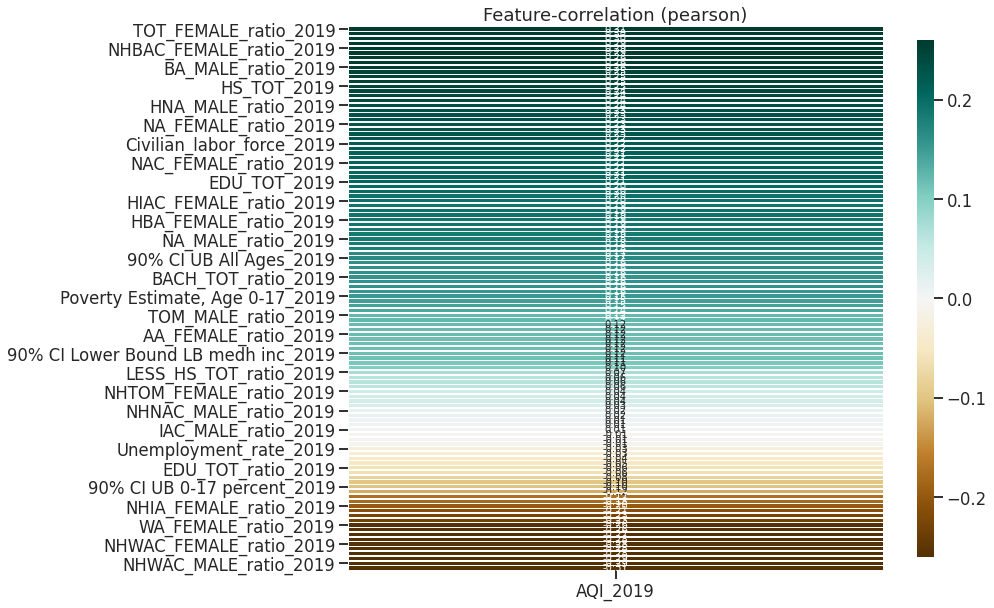

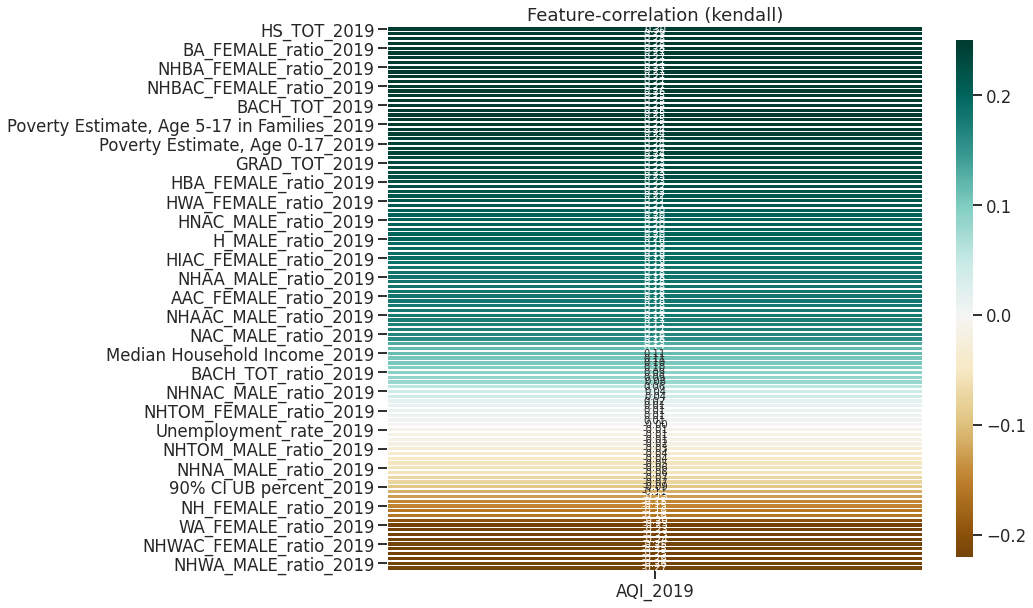

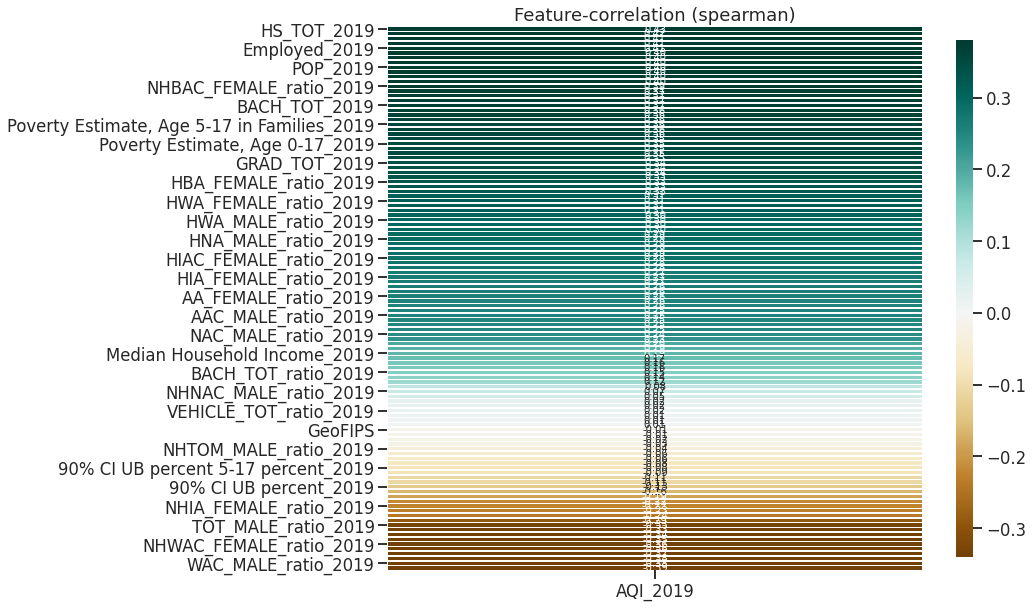

In [14]:
klib.corr_plot(df_2019, target='AQI_2019', method='pearson')
klib.corr_plot(df_2019, target='AQI_2019', method='kendall')
klib.corr_plot(df_2019, target='AQI_2019', method='spearman')

# Merge dataframe into df 2017-2019

In [15]:
pd.set_option('display.max_columns', 200)

df_2017_2018 = pd.merge(df_2017, df_2018, how='inner')
df_2017_2019 = pd.merge(df_2017_2018, df_2019, how='inner')

df_2017_2019

,GeoFIPS,State Name,county Name,AQI_2017,Civilian_labor_force_2017,Employed_2017,Unemployed_2017,Unemployment_rate_2017,"Poverty Estimate, All Ages_2017",90% CI LB All Ages_2017,90% CI UB All Ages_2017,"Poverty Percent, All Ages_2017",90% CI LB percent_2017,90% CI UB percent_2017,"Poverty Estimate, Age 0-17_2017",90% CI LB percent 0-17_2017,90% CI UB 0-17_2017,"Poverty Percent, Age 0-17_2017",90% CI LB percent 0-17 percent_2017,90% CI UB 0-17 percent_2017,"Poverty Estimate, Age 5-17 in Families_2017",90% CI LB 5-17 fam_2017,90% CI UB 5-17 fam_2017,"Poverty Percent, Age 5-17 in Families_2017",90% CI LB 5-17 percent_2017,90% CI UB percent 5-17 percent_2017,Median Household Income_2017,90% CI Lower Bound LB medh inc_2017,90% CI UB medh inc_2017,POP_2017,EDU_TOT_2017,LESS_HS_TOT_2017,HS_TOT_2017,COL_OR_ASSOC_TOT_2017,BACH_TOT_2017,GRAD_TOT_2017,VEHICLE_TOT_2017,EDU_TOT_ratio_2017,LESS_HS_TOT_ratio_2017,HS_TOT_ratio_2017,COL_OR_ASSOC_TOT_ratio_2017,BACH_TOT_ratio_2017,GRAD_TOT_ratio_2017,VEHICLE_TOT_ratio_2017,TOT_POP_2017,TOT_MALE_ratio_2017,TOT_FEMALE_ratio_2017,WA_MALE_ratio_2017,WA_FEMALE_ratio_2017,BA_MALE_ratio_2017,BA_FEMALE_ratio_2017,IA_MALE_ratio_2017,IA_FEMALE_ratio_2017,AA_MALE_ratio_2017,AA_FEMALE_ratio_2017,NA_MALE_ratio_2017,NA_FEMALE_ratio_2017,TOM_MALE_ratio_2017,TOM_FEMALE_ratio_2017,WAC_MALE_ratio_2017,WAC_FEMALE_ratio_2017,BAC_MALE_ratio_2017,BAC_FEMALE_ratio_2017,IAC_MALE_ratio_2017,IAC_FEMALE_ratio_2017,AAC_MALE_ratio_2017,AAC_FEMALE_ratio_2017,NAC_MALE_ratio_2017,NAC_FEMALE_ratio_2017,NH_MALE_ratio_2017,NH_FEMALE_ratio_2017,NHWA_MALE_ratio_2017,NHWA_FEMALE_ratio_2017,NHBA_MALE_ratio_2017,NHBA_FEMALE_ratio_2017,NHIA_MALE_ratio_2017,NHIA_FEMALE_ratio_2017,NHAA_MALE_ratio_2017,NHAA_FEMALE_ratio_2017,NHNA_MALE_ratio_2017,NHNA_FEMALE_ratio_2017,NHTOM_MALE_ratio_2017,NHTOM_FEMALE_ratio_2017,NHWAC_MALE_ratio_2017,NHWAC_FEMALE_ratio_2017,NHBAC_MALE_ratio_2017,NHBAC_FEMALE_ratio_2017,NHIAC_MALE_ratio_2017,NHIAC_FEMALE_ratio_2017,NHAAC_MALE_ratio_2017,NHAAC_FEMALE_ratio_2017,NHNAC_MALE_ratio_2017,NHNAC_FEMALE_ratio_2017,H_MALE_ratio_2017,H_FEMALE_ratio_2017,HWA_MALE_ratio_2017,HWA_FEMALE_ratio_2017,HBA_MALE_ratio_2017,HBA_FEMALE_ratio_2017,HIA_MALE_ratio_2017,...,"Poverty Percent, Age 0-17_2019",90% CI LB percent 0-17 percent_2019,90% CI UB 0-17 percent_2019,"Poverty Estimate, Age 5-17 in Families_2019",90% CI LB 5-17 fam_2019,90% CI UB 5-17 fam_2019,"Poverty Percent, Age 5-17 in Families_2019",90% CI LB 5-17 percent_2019,90% CI UB percent 5-17 percent_2019,Median Household Income_2019,90% CI Lower Bound LB medh inc_2019,90% CI UB medh inc_2019,POP_2019,EDU_TOT_2019,LESS_HS_TOT_2019,HS_TOT_2019,COL_OR_ASSOC_TOT_2019,BACH_TOT_2019,GRAD_TOT_2019,VEHICLE_TOT_2019,EDU_TOT_ratio_2019,LESS_HS_TOT_ratio_2019,HS_TOT_ratio_2019,COL_OR_ASSOC_TOT_ratio_2019,BACH_TOT_ratio_2019,GRAD_TOT_ratio_2019,VEHICLE_TOT_ratio_2019,TOT_POP_2019,TOT_MALE_ratio_2019,TOT_FEMALE_ratio_2019,WA_MALE_ratio_2019,WA_FEMALE_ratio_2019,BA_MALE_ratio_2019,BA_FEMALE_ratio_2019,IA_MALE_ratio_2019,IA_FEMALE_ratio_2019,AA_MALE_ratio_2019,AA_FEMALE_ratio_2019,NA_MALE_ratio_2019,NA_FEMALE_ratio_2019,TOM_MALE_ratio_2019,TOM_FEMALE_ratio_2019,WAC_MALE_ratio_2019,WAC_FEMALE_ratio_2019,BAC_MALE_ratio_2019,BAC_FEMALE_ratio_2019,IAC_MALE_ratio_2019,IAC_FEMALE_ratio_2019,AAC_MALE_ratio_2019,AAC_FEMALE_ratio_2019,NAC_MALE_ratio_2019,NAC_FEMALE_ratio_2019,NH_MALE_ratio_2019,NH_FEMALE_ratio_2019,NHWA_MALE_ratio_2019,NHWA_FEMALE_ratio_2019,NHBA_MALE_ratio_2019,NHBA_FEMALE_ratio_2019,NHIA_MALE_ratio_2019,NHIA_FEMALE_ratio_2019,NHAA_MALE_ratio_2019,NHAA_FEMALE_ratio_2019,NHNA_MALE_ratio_2019,NHNA_FEMALE_ratio_2019,NHTOM_MALE_ratio_2019,NHTOM_FEMALE_ratio_2019,NHWAC_MALE_ratio_2019,NHWAC_FEMALE_ratio_2019,NHBAC_MALE_ratio_2019,NHBAC_FEMALE_ratio_2019,NHIAC_MALE_ratio_2019,NHIAC_FEMALE_ratio_2019,NHAAC_MALE_ratio_2019,NHAAC_FEMALE_ratio_2019,NHNAC_MALE_ratio_2019,NHNAC_FEMALE_ratio_2019,H_MALE_ratio_2019,H_FEMALE_ratio_2019,HWA_MALE_ratio_2019,HWA_FEMALE_ratio_2019,HBA_MALE_

# save data


In [16]:
data_path = r'../../data/processed/alt_df_2017_2019'
df_2017_2019.to_csv(data_path, index=False)


In [17]:
display(df_2017.corr()['AQI_2017'].sort_values().tail(15))
display(df_2018.corr()['AQI_2018'].sort_values().tail(15))
display(df_2019.corr()['AQI_2019'].sort_values().tail(15))

HNA_FEMALE_ratio_2017      0.178379
HNAC_FEMALE_ratio_2017     0.178504
Unemployed_2017            0.184095
VEHICLE_TOT_2017           0.196019
HS_TOT_2017                0.197696
TOT_FEMALE_ratio_2017      0.220262
NHBA_MALE_ratio_2017       0.249691
BA_MALE_ratio_2017         0.251298
NHBAC_MALE_ratio_2017      0.252901
BAC_MALE_ratio_2017        0.255845
NHBA_FEMALE_ratio_2017     0.268390
BA_FEMALE_ratio_2017       0.269131
NHBAC_FEMALE_ratio_2017    0.271527
BAC_FEMALE_ratio_2017      0.272994
AQI_2017                   1.000000
Name: AQI_2017, dtype: float64

COL_OR_ASSOC_TOT_2018      0.277397
HNAC_FEMALE_ratio_2018     0.279223
HNA_FEMALE_ratio_2018      0.282646
NHBA_MALE_ratio_2018       0.282660
NHBAC_MALE_ratio_2018      0.283912
Unemployed_2018            0.287296
BA_MALE_ratio_2018         0.295422
BAC_MALE_ratio_2018        0.300330
TOT_FEMALE_ratio_2018      0.317739
NHBA_FEMALE_ratio_2018     0.318817
VEHICLE_TOT_2018           0.319489
NHBAC_FEMALE_ratio_2018    0.320302
BA_FEMALE_ratio_2018       0.329001
BAC_FEMALE_ratio_2018      0.333196
AQI_2018                   1.000000
Name: AQI_2018, dtype: float64

Unemployed_2019            0.244824
HS_TOT_2019                0.246075
NHBA_MALE_ratio_2019       0.248380
HNAC_FEMALE_ratio_2019     0.248888
NHBAC_MALE_ratio_2019      0.249165
BA_MALE_ratio_2019         0.258042
BAC_MALE_ratio_2019        0.261532
HNA_FEMALE_ratio_2019      0.264522
NHBA_FEMALE_ratio_2019     0.291513
NHBAC_FEMALE_ratio_2019    0.292222
VEHICLE_TOT_2019           0.294502
BA_FEMALE_ratio_2019       0.297602
BAC_FEMALE_ratio_2019      0.300202
TOT_FEMALE_ratio_2019      0.307407
AQI_2019                   1.000000
Name: AQI_2019, dtype: float64